In [5]:
# 1. ReLU (Rectified Linear Unit)
#    - Formula: f(x) = max(0, x)
#    ✅ Advantages:
#       - Very fast to compute
#       - Helps with vanishing gradient problem
#       - Works well in deep networks
#    ❌ Disadvantages:
#       - "Dying ReLU" problem: neurons can get stuck at 0
#       - Not zero-centered

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Clear previous TF graphs
tf.keras.backend.clear_session()

# Load dataset
X, y = load_wine(return_X_y=True)
y_onehot = to_categorical(y, num_classes=3)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile
model1.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train
history1 = model1.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4126 - loss: 1.1482 - val_accuracy: 0.7500 - val_loss: 0.9980
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5858 - loss: 1.0086 - val_accuracy: 0.7500 - val_loss: 0.8517
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6829 - loss: 0.8658 - val_accuracy: 0.7778 - val_loss: 0.7314
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7230 - loss: 0.7416 - val_accuracy: 0.8611 - val_loss: 0.6322
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8722 - loss: 0.6323 - val_accuracy: 0.9167 - val_loss: 0.5471
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8891 - loss: 0.5850 - val_accuracy: 0.9444 - val_loss: 0.4722
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9297 - loss: 0.4795 - val_accuracy: 0.9722 - val_loss: 0.4068
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9503 - loss: 0.4227 - val_accuracy: 1.0000 - val_loss: 0.3466
Epoc

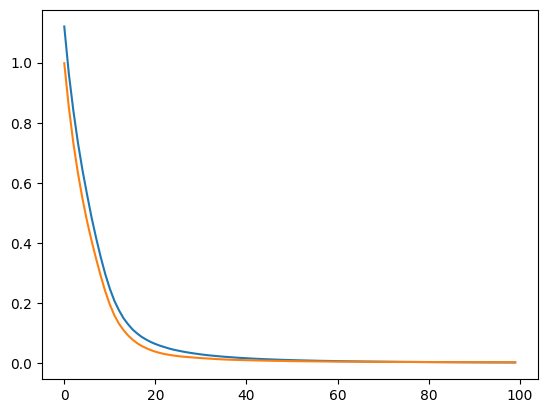

In [3]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

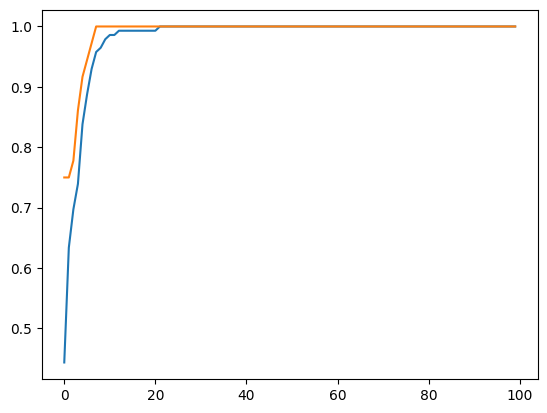

In [4]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

In [15]:
# 2. Sigmoid
#    - Formula: f(x) = 1 / (1 + e^(-x))
#    ✅ Advantages:
#       - Smooth output in range (0,1), interpretable as probability
#       - Historically used in shallow networks
#    ❌ Disadvantages:
#       - Vanishing gradient for large +/– inputs
#       - Slow convergence
#       - Outputs not zero-centered

In [7]:
model2 = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(3, activation='softmax')
])

# Compile
model2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train
history2 = model2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.3213 - loss: 1.2968 - val_accuracy: 0.3889 - val_loss: 1.1864
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3571 - loss: 1.1848 - val_accuracy: 0.4167 - val_loss: 1.1083
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3810 - loss: 1.1121 - val_accuracy: 0.6111 - val_loss: 1.0540
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5656 - loss: 1.0685 - val_accuracy: 0.6111 - val_loss: 1.0080
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6247 - loss: 1.0160 - val_accuracy: 0.8056 - val_loss: 0.9747
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7400 - loss: 0.9912 - val_accuracy: 0.7222 - val_loss: 0.9507
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6179 - loss: 0.9635 - val_accuracy: 0.6667 - val_loss: 0.9288
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6266 - loss: 0.9284 - val_accuracy: 0.6667 - val_loss: 0.9057
Epoc

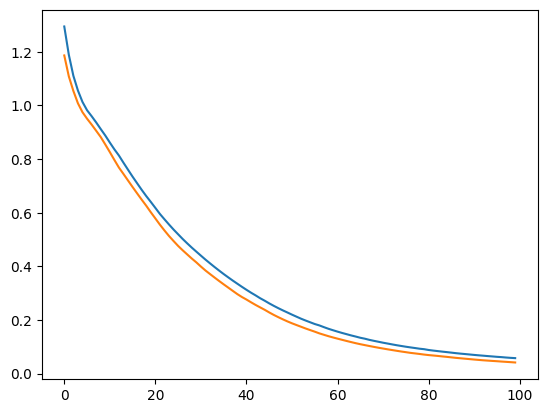

In [8]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

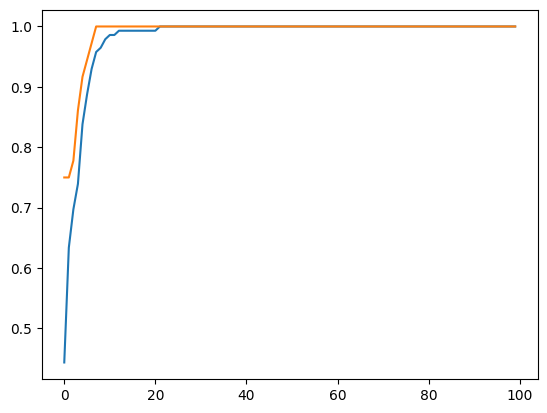

In [9]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

In [16]:
# 3. Tanh (Hyperbolic Tangent)
#    - Formula: f(x) = (e^x - e^-x) / (e^x + e^-x)
#    ✅ Advantages:
#       - Output in range (-1,1), zero-centered → better than sigmoid
#       - Good for shallow networks
#    ❌ Disadvantages:
#       - Still suffers from vanishing gradients
#       - More expensive to compute than ReLU

In [12]:
model3 = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(3, activation='softmax')
])

# Compile
model3.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train
history3 = model3.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6712 - loss: 0.8406 - val_accuracy: 0.8611 - val_loss: 0.6215
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8623 - loss: 0.5694 - val_accuracy: 0.9444 - val_loss: 0.4355
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9083 - loss: 0.4365 - val_accuracy: 0.9444 - val_loss: 0.3194
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9368 - loss: 0.3277 - val_accuracy: 0.9444 - val_loss: 0.2468
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9354 - loss: 0.2888 - val_accuracy: 0.9444 - val_loss: 0.1990
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9338 - loss: 0.2435 - val_accuracy: 0.9444 - val_loss: 0.1652
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9605 - loss: 0.1955 - val_accuracy: 0.9722 - val_loss: 0.1397
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9583 - loss: 0.1885 - val_accuracy: 0.9722 - val_loss: 0.1209
Epoc

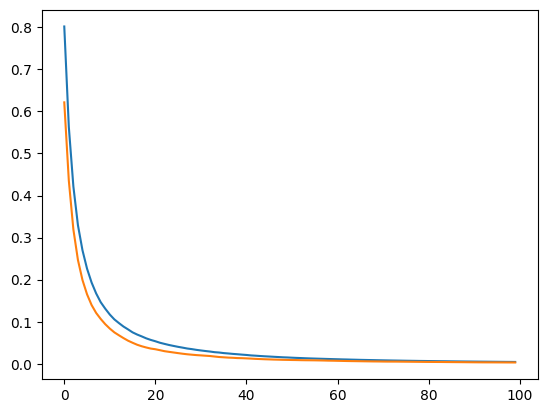

In [13]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

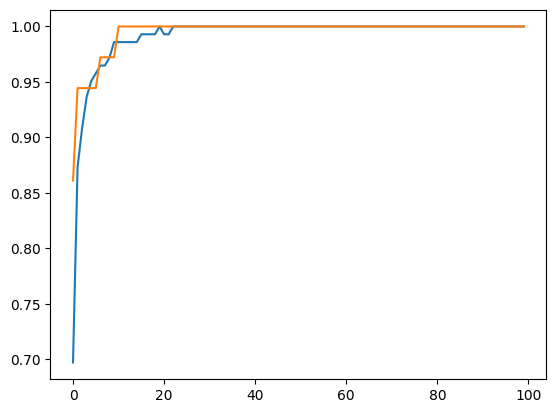

In [14]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

In [17]:
# 4. Leaky ReLU
#    - Formula: f(x) = x if x>0 else αx (α ~ 0.01)
#    ✅ Advantages:
#       - Fixes "dying ReLU" by allowing small negative slope
#       - Still efficient like ReLU
#    ❌ Disadvantages:
#       - α is a hyperparameter to tune
#       - Can still cause unstable training if not tuned properly

In [18]:
from tensorflow.keras.layers import LeakyReLU


In [19]:
model4 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),     # no activation here
    LeakyReLU(alpha=0.01),                          # add LeakyReLU
    Dense(32),
    LeakyReLU(alpha=0.01),                          # second hidden layer with LeakyReLU
    Dense(3, activation="softmax")                  # output layer for 3 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [21]:
# Compile model
model4.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train model
history = model4.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.1819 - loss: 1.2231 - val_accuracy: 0.6667 - val_loss: 0.9435
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5589 - loss: 0.9255 - val_accuracy: 0.8889 - val_loss: 0.7047
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9287 - loss: 0.6838 - val_accuracy: 0.9722 - val_loss: 0.5352
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9513 - loss: 0.5365 - val_accuracy: 0.9722 - val_loss: 0.4025
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9779 - loss: 0.4070 - val_accuracy: 1.0000 - val_loss: 0.3024
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9591 - loss: 0.3285 - val_accuracy: 1.0000 - val_loss: 0.2263
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9825 - loss: 0.2453 - val_accuracy: 1.0000 - val_loss: 0.1722
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9879 - loss: 0.1922 - val_accuracy: 1.0000 - val_loss: 0.1347


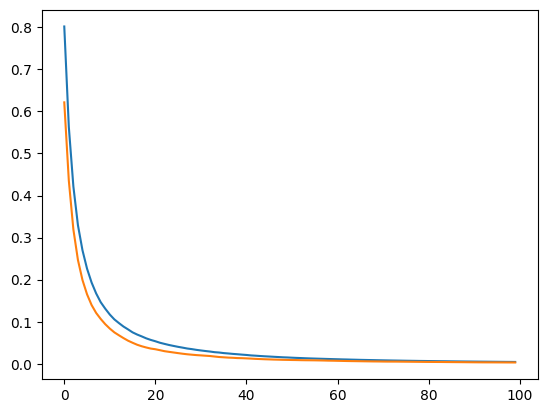

In [22]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

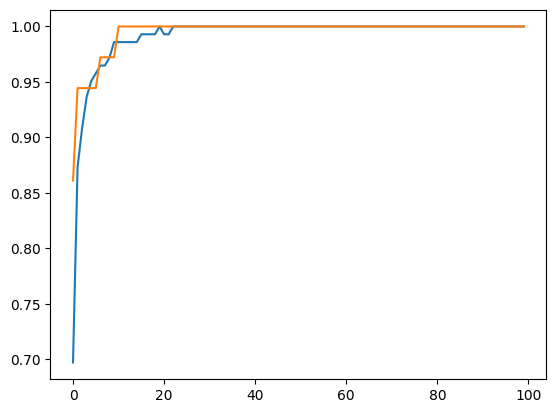

In [23]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])